In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from helpers.helpers import basic_stats_cat, cat_plot

# Basic plot configuration
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['figure.figsize'] = (20,15)
sns.set_theme(style="whitegrid")

In [41]:
def change_target_position(df, target, position=None):
    if position is None:
        position = df.shape[1] - 1
    target_col = df.pop(target)
    df.insert(num_col, target, target_col)
    return df

In [53]:
# Load the gapminder dataset
# Dataset description : https://www.gapminder.org/data/
gm = pd.read_csv('../input/gm_2008_region.csv', sep=',')
gm = change_target_position(gm, 'life')

# Print number of features
print(f"Number of features: {gm.shape[1]}")

# Print number of categorical features
cat_features = list(gm.select_dtypes(include='object').columns)
print(f"Number of categorical features: {len(cat_features)}")
print(cat_features)

# Print number of numerical features
num_features = list(gm.select_dtypes(exclude='object').columns)
print(f"Number of categorical features: {len(num_features)}")
print(num_features)

Number of features: 10
Number of categorical features: 1
['Region']
Number of categorical features: 9
['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality', 'life']


### EDA (Numerical Features)

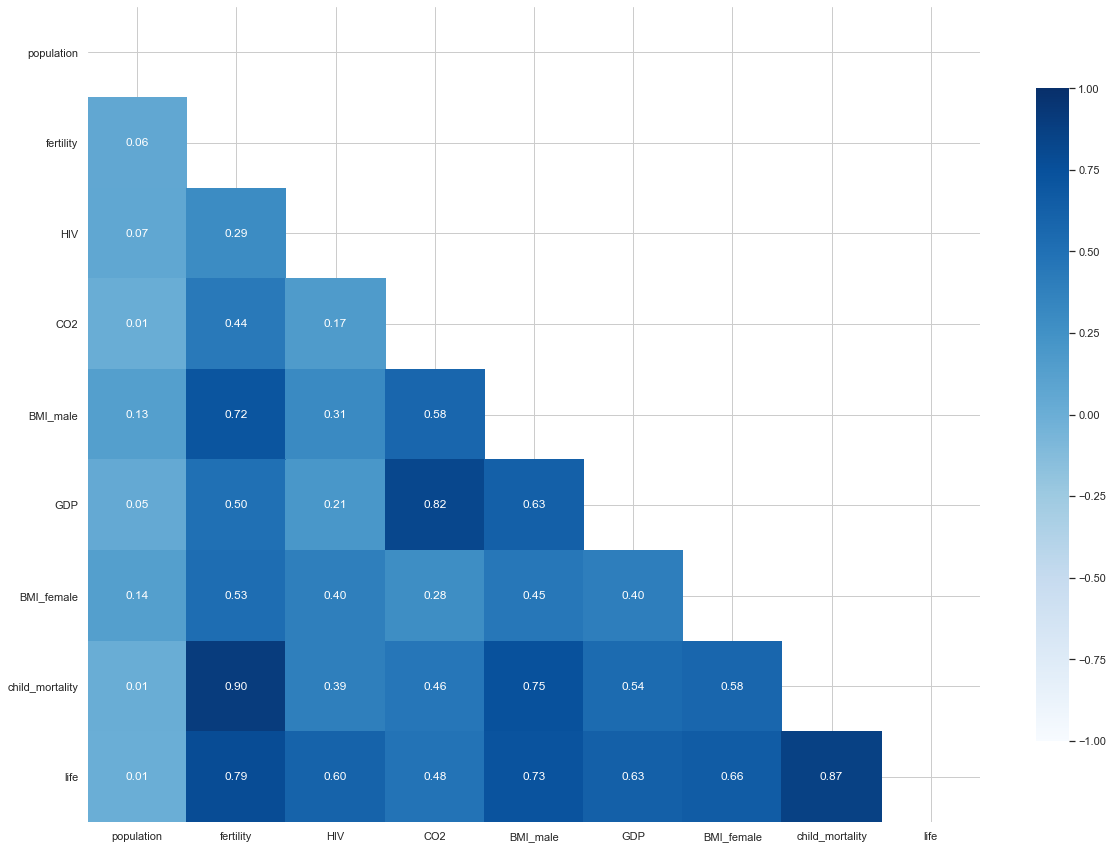

In [54]:
# Compute the correlation matrix:
df_corr = gm.corr().abs()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# plot heatmap
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.grid()
plt.show()

In [55]:
# Select all the features with high correlation (>0.95):
tri_df = df_corr.mask(mask)
features_whc = [c for c in tri_df.columns if any(tri_df[c]>0.95)]
print(f"Number of features highly correlated: {len(features_whc)}")

Number of features highly correlated: 0


In [57]:
# Select all the features that are highly correlated with the target "fertility":
features_correlated_target = [c for c in tri_df.columns if tri_df.loc['life', c]>0.6]
print(f"Number of features highly correlated with the target (fertility): {len(features_correlated_target)}")
print(features_correlated_target)

Number of features highly correlated with the target (fertility): 6
['fertility', 'HIV', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']


Text(0.5, 1.0, 'Life vs BMI_male')

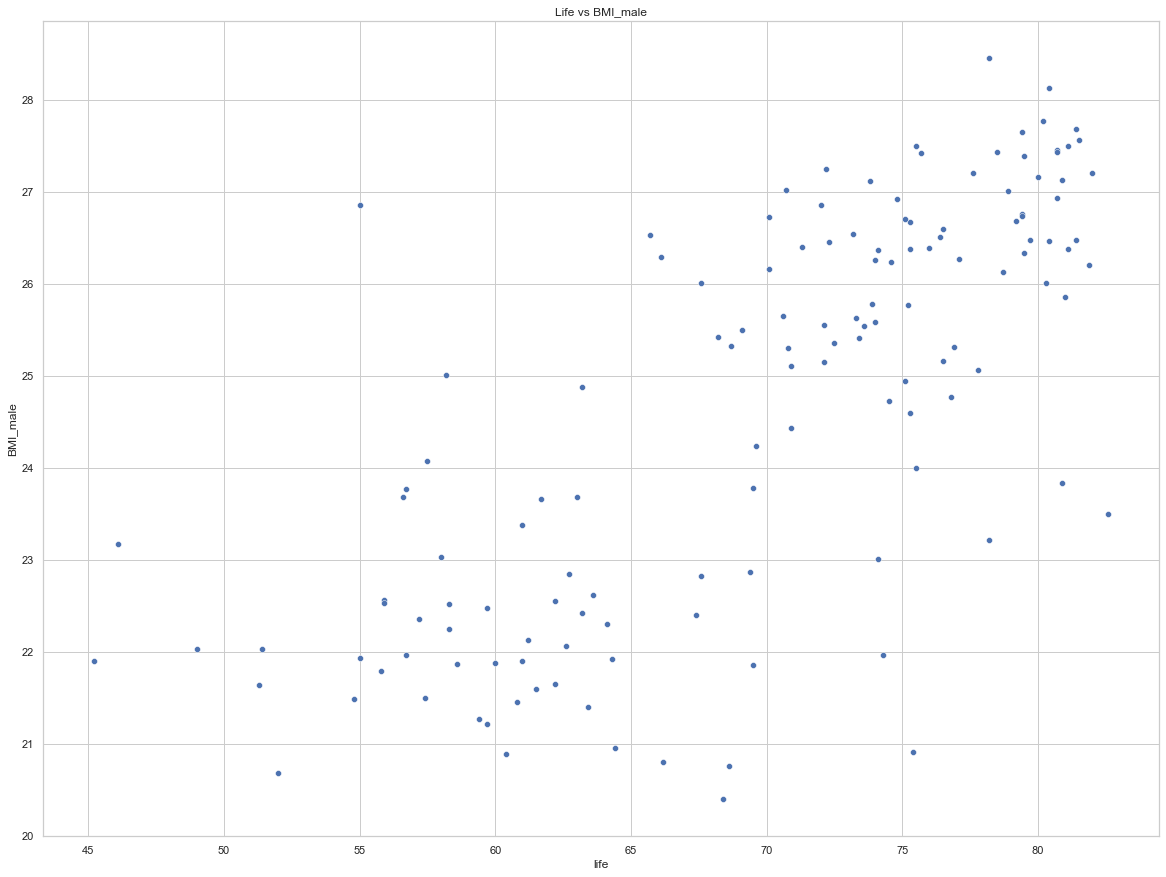

In [67]:
# Scatter plot target vs BMI male
sns.scatterplot(x='life', y='BMI_male', data=gm)
plt.title('Life vs BMI_male')

Text(0.5, 1.0, 'Life vs BMI_female')

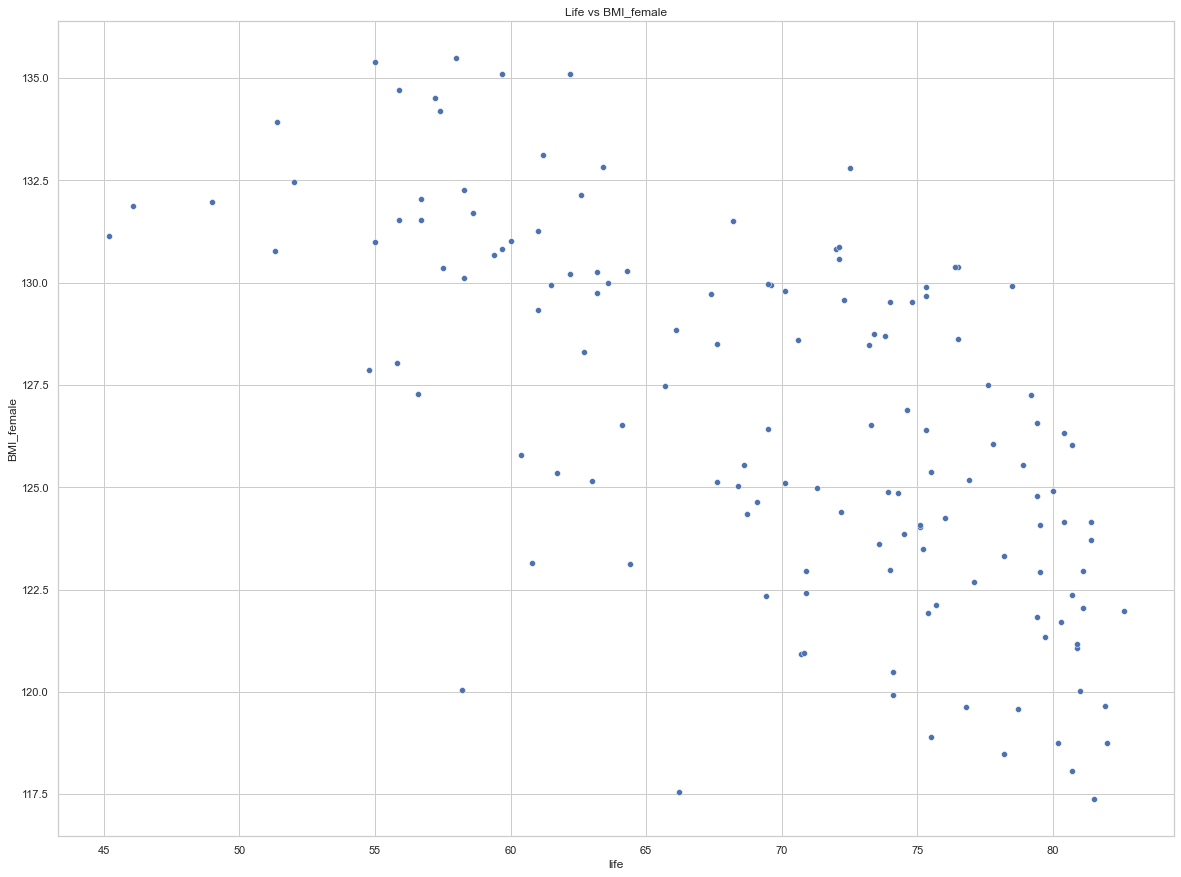

In [66]:
# Scatter plot target vs BMI female
sns.scatterplot(x='life', y='BMI_female', data=gm)
plt.title('Life vs BMI_female')

Text(0.5, 1.0, 'Life vs fertility')

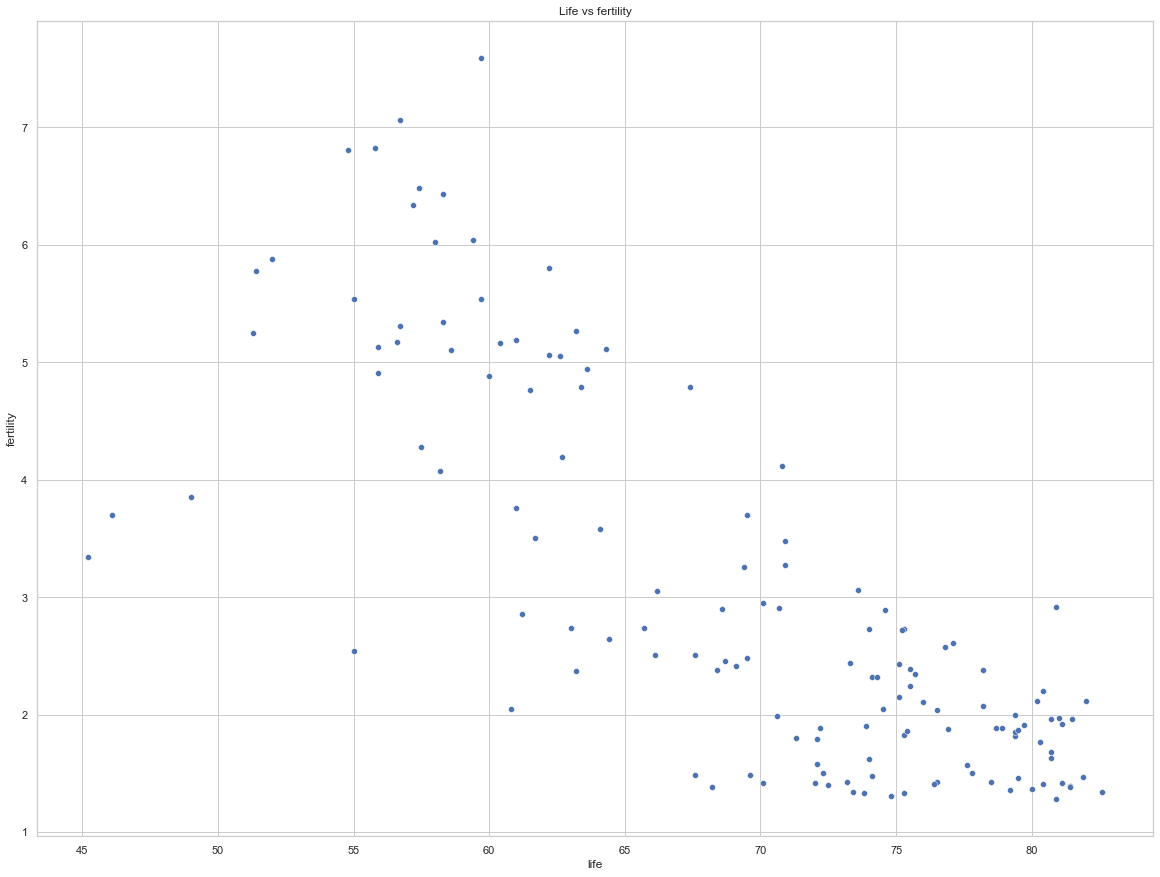

In [65]:
# Scatter plot target vs fertility
sns.scatterplot(x='life', y='fertility', data=gm)
plt.title('Life vs fertility')

Text(0.5, 1.0, 'Life vs HIV£')

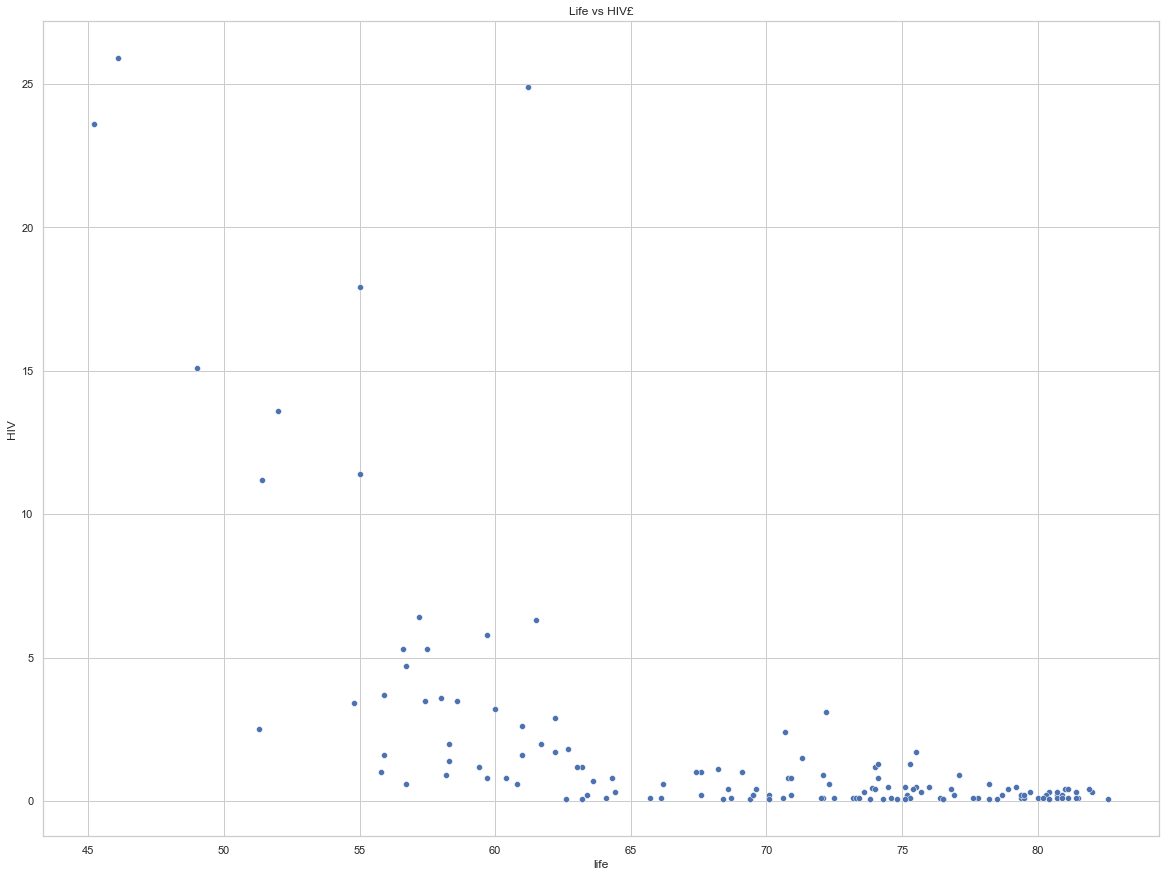

In [68]:
# Scatter plot target vs HIV
sns.scatterplot(x='life', y='HIV', data=gm)
plt.title('Life vs HIV£')

### EDA (Categorical Features)

In [70]:
# Basic stats on the categorical features:
basic_stats_cat(gm)

,Unique Values,Number of Unique Values,Number of Missing Data
Region,"[Middle East & North Africa, Sub-Saharan Afric...",6,0


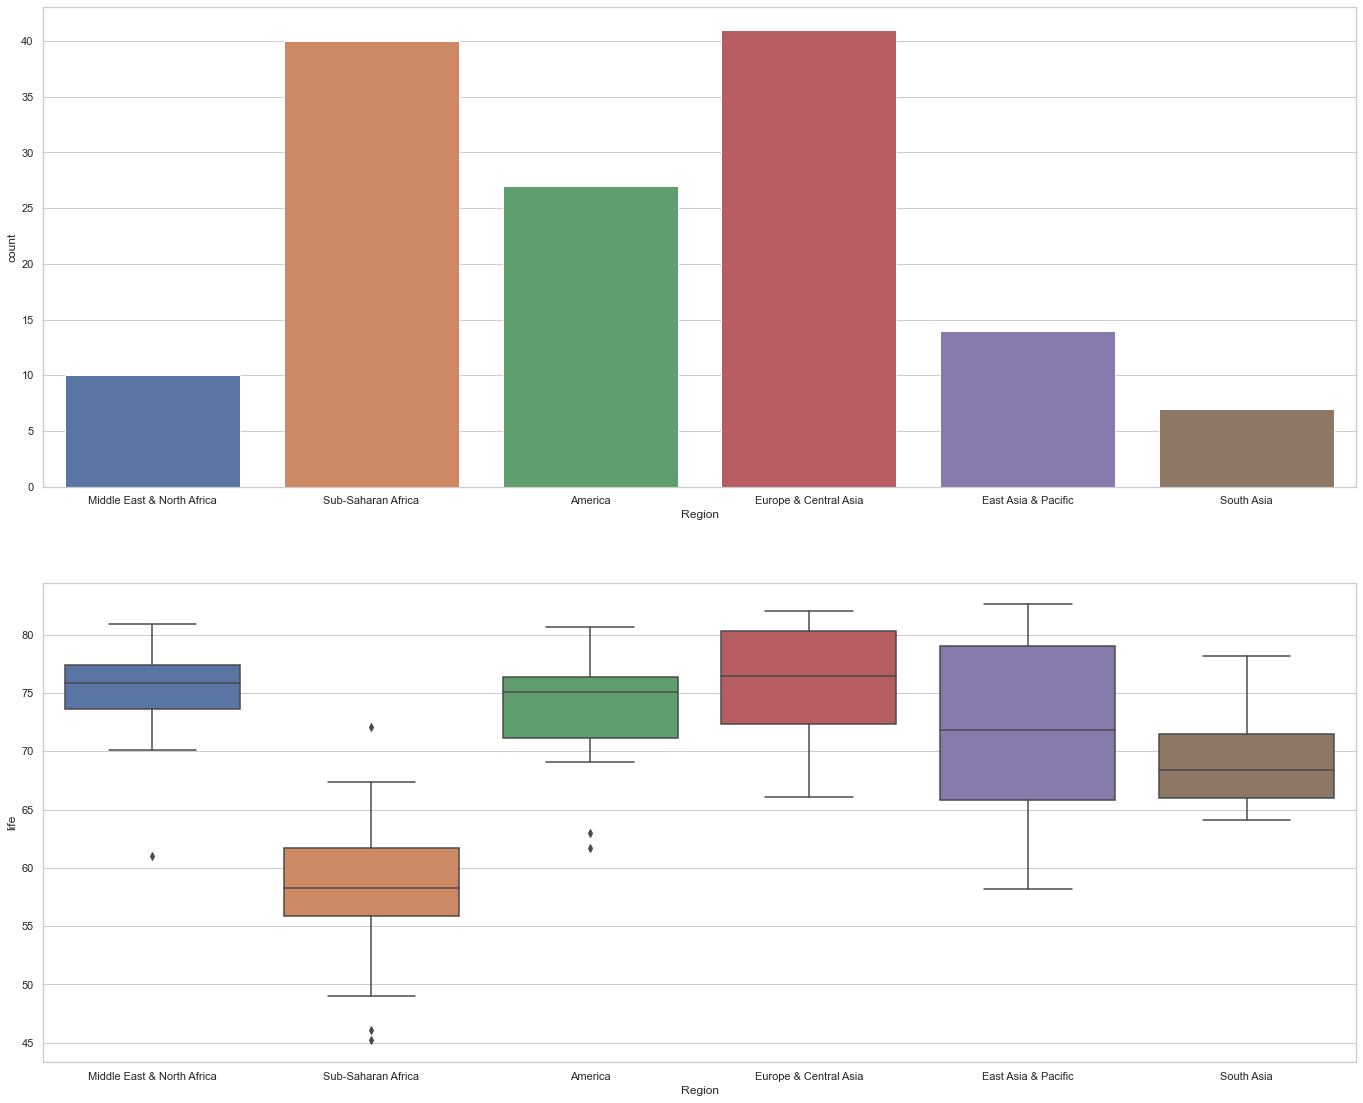

In [72]:
# Plot target vs categorical features + countplot
cat_plot(gm, 'life')